In [1]:
import finesse.virgo

from finesse.analysis.actions import RunLocks, CheckLinearity, GetErrorSignals
from finesse.virgo.actions import DARM_RF_to_DC

import matplotlib.pyplot as plt

finesse.init_plotting()
finesse.configure(progress_bars=True)

These examples are to show how to use this package with typical commissioning work:

0. Create a pre-tuned Virgo file
1. changing locks
2. pretuned file, change roc, pretune, optimize, run locks
3. plotting error signals
4. showing sensing matrix
5. plotting QNLS
6. plotting DARM TF
6. plotting DoFs

Useful prints:
1. print_lengths()
2. print_powers()
3. print_tunings()
4. print_settings()
5. print_locks()
6. print_thermal_state()

## Ex. 0: Create a pre-tuned Virgo file
This example shows how to create a pre-tuned Virgo file which will be used for the remainder of the notebook.

Before tuning
┌─────────────────────────────────────────────────┐
│- Arm lengths [m]:                               │
│  LN   = 2999.8180   LW = 2999.7880              │
├─────────────────────────────────────────────────┤
│- Michelson and recycling lengths [m]:           │
│  ln   = 6.0152      lw       = 5.7851           │
│  lpr  = 6.0513      lsr      = 6.0509           │
│  lMI  = 5.9001      lSchnupp = 0.2301           │
│  lPRC = 11.9515     lSRC     = 11.9511          │
├─────────────────────────────────────────────────┤
│- Associated cavity frequencies [Hz]:            │
│  fsrN   = 49968.44    fsrW   = 49968.94         │
│  fsrPRC = 12542050.98 fsrSRC = 12542480.59      │
│                                                 │
│- Modulation sideband frequencies [MHz]:         │
│  f6     = 6.270777     f8     = 8.361036        │
│  f56     = 56.436993                            │
├─────────────────────────────────────────────────┤
│- Check frequency match [MHz]:                   

PRCL_lock ✗ MICH_lock ✗ CARM_lock ✗ DARM_rf_lock ✗ SRCL_lock ✗ |##########| 10000/10000

DARM_rf_lock ✗ |##########| 10000/10000

DARM_dc_lock ✗ |##########| 10000/10000

After DARM DC lock
┌─────────────────────────────────────────────────┐
│- Arm lengths [m]:                               │
│  LN   = 2999.8180   LW = 2999.7880              │
├─────────────────────────────────────────────────┤
│- Michelson and recycling lengths [m]:           │
│  ln   = 6.0152      lw       = 5.7851           │
│  lpr  = 6.0518      lsr      = 6.0518           │
│  lMI  = 5.9001      lSchnupp = 0.2301           │
│  lPRC = 11.9520     lSRC     = 11.9520          │
├─────────────────────────────────────────────────┤
│- Associated cavity frequencies [Hz]:            │
│  fsrN   = 49968.44    fsrW   = 49968.94         │
│  fsrPRC = 12541554.00 fsrSRC = 12541554.00      │
│                                                 │
│- Modulation sideband frequencies [MHz]:         │
│  f6     = 6.270777     f8     = 8.361036        │
│  f56     = 56.436993                            │
├─────────────────────────────────────────────────┤
│- Check frequency match [MHz]:              

regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for nonsingular commands not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for nonsingular commands not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet


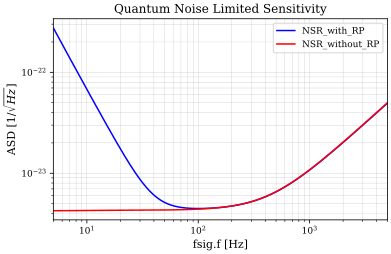

In [2]:
# 0. This creates a pretuned Virgo file using the common file.
#   (to be used by the following examples)
# TODO: how to make silent?
virgo = finesse.virgo.Virgo()

print('Before tuning')
virgo.print_lengths()
virgo.print_powers()

# step 1: adjust the cavity lengths
virgo.adjust_PRC_length()
virgo.adjust_SRC_length()

# step 2: pretune
virgo.pretune()

# step 3: optimize demodulation phases
virgo.optimize_demodulation_phase()

# step 4: optimize lock gains
virgo.optimize_lock_gains()

# step 5: run locks
virgo.model.run(RunLocks(method="newton"))
virgo.model.run(DARM_RF_to_DC())

print('After DARM DC lock')
virgo.print_lengths()
virgo.print_powers()

virgo.plot_QNLS()

# save configuration for future reference
virgo.model.unparse_file('pretuned_virgo.kat')

## Ex. 1: Changing Locks
This example shows how to work with locks:
1. Display lock information
2. Toggle a lock
3. Changing lock gain

In [3]:
# lock information can be displayed
virgo.print_locks()

# locks can be turned on or off
virgo.model.DARM_dc_lock.disabled = True
virgo.model.DARM_rf_lock.disabled = False

# The lock gain can be set directly
virgo.model.DARM_rf_lock.gain = -0.007

PRCL_lock B2_8_I PRCL.DC gain=-63.740578780580684 disabled=False
MICH_lock B2_56_Q MICH.DC gain=1971.349791647314 disabled=False
CARM_lock B2_6_I CARM.DC gain=-0.16134345833268993 disabled=False
DARM_rf_lock B1p_56_I DARM.DC gain=-0.006585599156798293 disabled=True
DARM_dc_lock B1_DC DARM.DC gain=-0.01 disabled=False
SRCL_lock B2_56_I SRCL.DC gain=-3830.806852288948 disabled=False


## Ex. 2: Changing parameters with a pre-tuned script

PRCL_lock B2_8_I PRCL.DC gain=-63.740578780580684 disabled=False
MICH_lock B2_56_Q MICH.DC gain=1971.349791647314 disabled=False
CARM_lock B2_6_I CARM.DC gain=-0.16134345833268993 disabled=False
DARM_rf_lock B1p_56_I DARM.DC gain=-0.006585599156798293 disabled=True
DARM_dc_lock B1_DC DARM.DC gain=-0.01 disabled=False
SRCL_lock B2_56_I SRCL.DC gain=-3830.806852288948 disabled=False


PRCL_lock ✗ MICH_lock ✗ CARM_lock ✗ DARM_rf_lock ✗ SRCL_lock ✗ |##########| 10000/10000

DARM_rf_lock ✗ |##########| 10000/10000

DARM_dc_lock ✗ |##########| 10000/10000

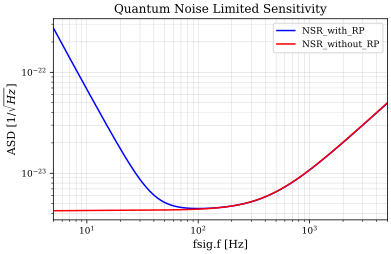

In [4]:
# 2. How to load a pretuned file, change a parameter (PR.Rc in this case)
#   and then get back to an operating point.

# load a pretuned file
virgo = finesse.virgo.Virgo('pretuned_virgo.kat')

# show status of locks
virgo.print_locks()

# switch back to the DARM RF lock since the pretuned file uses DARM DC lock
virgo.model.DARM_dc_lock.disabled = True
virgo.model.DARM_rf_lock.disabled = False

# change a parameter
virgo.model.PR.Rcx += 1
virgo.model.PR.Rcy += 1

# re-pretune again
virgo.pretune()

# re-optimize demodulation phases and lock gains
virgo.optimize_demodulation_phase()
virgo.optimize_lock_gains()

# run the locks to bring it back into a locked state
virgo.model.run(RunLocks(method="newton"))
virgo.model.run(DARM_RF_to_DC())

virgo.plot_QNLS()

## Ex. 3: Plot error signals

(<Figure size 768x576 with 6 Axes>,
 array([<AxesSubplot:xlabel='PRCL [deg]', ylabel='B2_8_I [W]'>,
        <AxesSubplot:xlabel='MICH [deg]', ylabel='B2_56_Q [W]'>,
        <AxesSubplot:xlabel='CARM [deg]', ylabel='B2_6_I [W]'>,
        <AxesSubplot:xlabel='DARM [deg]', ylabel='B1p_56_I [W]'>,
        <AxesSubplot:xlabel='DARM [deg]', ylabel='B1_DC [W]'>,
        <AxesSubplot:xlabel='SRCL [deg]', ylabel='B2_56_I [W]'>],
       dtype=object))

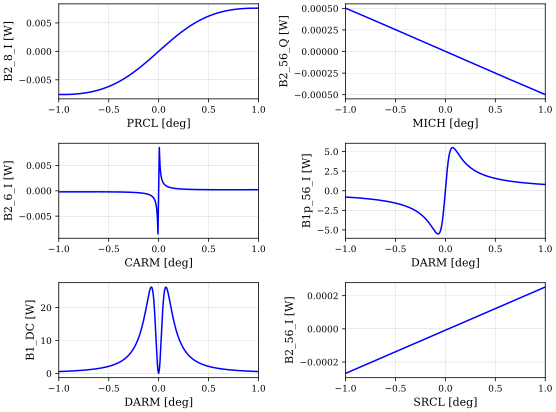

In [5]:
# one plot per lock
# virgo = finesse.virgo.Virgo()
# print(virgo.model.run(GetErrorSignals()).results)
# # virgo.model.run(CheckLinearity())
# virgo.make()
# print(virgo.model.run(GetErrorSignals()).results)
# virgo.model.run(CheckLinearity())
virgo.plot_error_signals()

## Ex. 4: Display the sensing matrix

In [6]:
# 4. Showing sensing matrix
print(virgo.get_sensing_matrix())

┌──────╥─────────┬──────────┬─────────┬──────────┬──────────┬──────────┬──────────┬──────────┬─────────┬──────────┐
│      ║ B2_8_I  │  B2_8_Q  │ B2_56_I │ B2_56_Q  │  B2_6_I  │  B2_6_Q  │ B1p_56_I │ B1p_56_Q │ B2_56_I │ B2_56_Q  │
╞══════╬═════════╪══════════╪═════════╪══════════╪══════════╪══════════╪══════════╪══════════╪═════════╪══════════╡
│ PRCL ║   0.016 │ -1.4E-11 │ -0.0031 │   0.0024 │  -0.0029 │  4.4E-05 │  4.7E-05 │ -0.00045 │ -0.0031 │   0.0024 │
├──────╫─────────┼──────────┼─────────┼──────────┼──────────┼──────────┼──────────┼──────────┼─────────┼──────────┤
│ MICH ║ 3.7E-05 │  5.8E-08 │ 8.2E-06 │ -0.00051 │ -6.4E-06 │ -7.3E-05 │     0.53 │  0.00014 │ 8.2E-06 │ -0.00051 │
├──────╫─────────┼──────────┼─────────┼──────────┼──────────┼──────────┼──────────┼──────────┼─────────┼──────────┤
│ CARM ║    -4.5 │ -3.5E-06 │     4.9 │    -0.67 │      6.2 │  2.8E-08 │     0.29 │    0.012 │     4.9 │    -0.67 │
├──────╫─────────┼──────────┼─────────┼──────────┼──────────┼──────────┼

## Ex. 5: Plot the QNLS

/home/jon/miniconda3/envs/f3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


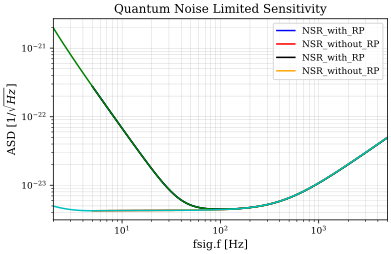

In [7]:
# quick default plot
virgo.plot_QNLS()

# with custom x-axis
virgo.plot_QNLS(axis=[5, 5000, 100])

# get_QNLS() returns a Solution which contains more information
# see documentation: https://finesse.docs.ligo.org/finesse3/api/solutions/array/finesse.solutions.array.ArraySolution.html
out = virgo.get_QNLS(axis=[2, 5000, 100])
plt.loglog(out.x1, out['NSR_with_RP'], out.x1, out['NSR_without_RP'])

## Ex. 6: Plot the DARM transfer function

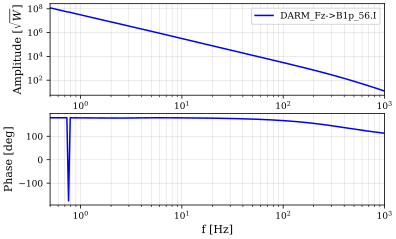

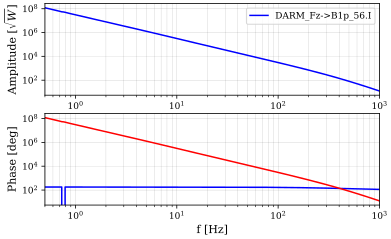

In [9]:
# quick default plot
virgo.plot_DARM()

# with custom x-axis
virgo.plot_DARM(axis=[0.5, 1000, 200])

# get_DARM() returns a Solution which contains more information
# see documentation: https://finesse.docs.ligo.org/finesse3/api/solutions/array/finesse.solutions.array.ArraySolution.html
out = virgo.get_DARM(axis=[0.5, 1000, 200])
plt.loglog(out.f, abs(out['darm']))

## Ex. 7: Plot DoF scans

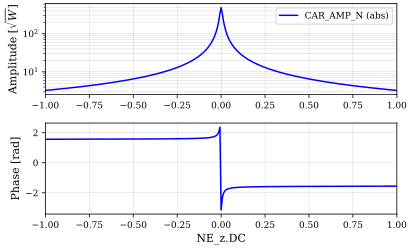

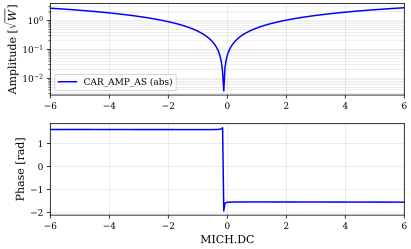

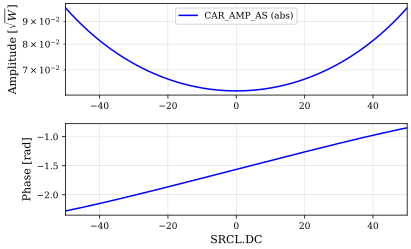

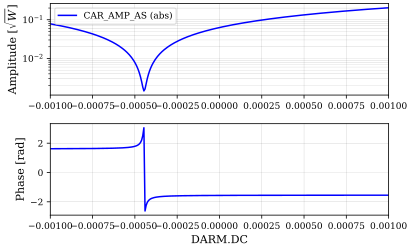

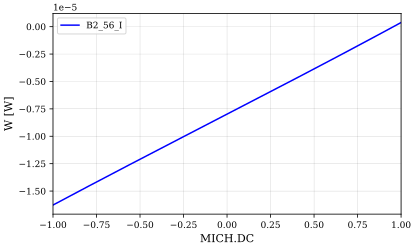

<ArraySolution of series/xaxis @ 0x7ff3a70e5c40 children=0>

In [10]:
# see power in North arm when tuning end mirror
virgo.dof_plot('NE_z', "CAR_AMP_N")

# watch behavior of anti-symmetric port for different dofs
virgo.dof_plot('MICH', "CAR_AMP_AS", xscale=6)
virgo.dof_plot('SRCL', "CAR_AMP_AS", xscale=50)
virgo.dof_plot('DARM', "CAR_AMP_AS", xscale=0.001)

# plot MICH error signal
virgo.dof_plot('MICH', 'B2_56_I', xscale=1, logy=False)

# Useful print outs

In [11]:
virgo.print_lengths()
virgo.print_powers()
virgo.print_tunings()
virgo.print_settings()
virgo.print_dofs()
virgo.print_thermal_values()

┌─────────────────────────────────────────────────┐
│- Arm lengths [m]:                               │
│  LN   = 2999.8180   LW = 2999.7880              │
├─────────────────────────────────────────────────┤
│- Michelson and recycling lengths [m]:           │
│  ln   = 6.0152      lw       = 5.7851           │
│  lpr  = 6.0518      lsr      = 6.0518           │
│  lMI  = 5.9001      lSchnupp = 0.2301           │
│  lPRC = 11.9520     lSRC     = 11.9520          │
├─────────────────────────────────────────────────┤
│- Associated cavity frequencies [Hz]:            │
│  fsrN   = 49968.44    fsrW   = 49968.94         │
│  fsrPRC = 12541554.00 fsrSRC = 12541554.00      │
│                                                 │
│- Modulation sideband frequencies [MHz]:         │
│  f6     = 6.270777     f8     = 8.361036        │
│  f56     = 56.436993                            │
├─────────────────────────────────────────────────┤
│- Check frequency match [MHz]:                   │
│  125.5*fsr